# <center>LOGS2008 AIP Project (Group D4)</center>
----------------------------------------------------------------------
----------------------------------------------------------------------
#### Group: D4
1. Nishi Agrawal (500199806)
2. Kiranmayee Porla (500200047)
3. Keval Padsala (500199506)
4. Siddharth Agarwal (500200420)
5. Sahishn Gaddam(500199700)
6. Vaibhav Kumar(500199531)

### Import required libraries.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

# Imported Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time, string, re, math
from collections import Counter


from tqdm import tqdm
from plotly import graph_objs as go
from plotly import express as px
from plotly import figure_factory as ff
from plotly.subplots import make_subplots

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    KFold,
    StratifiedKFold,
    StratifiedShuffleSplit,
    cross_val_predict
)
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score, roc_curve,
    accuracy_score,
    classification_report,
    make_scorer,
    matthews_corrcoef,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Other Libraries
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings("ignore")



In [ ]:
# Reference: https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

### Read the CSV file from the drive.


In [ ]:
urls = [
    "https://drive.google.com/file/d/1NRUT6xPjpUnHWyn9rDA6I0n3Dhi2614j/view?usp=sharing","https://drive.google.com/file/d/1E6kMCJygtqqYtChih161R3NPq-Jr6Eyi/view?usp=sharing",
    "https://drive.google.com/file/d/1Ke7ABoc5qrXFQ0Y9_Pt3tvGEzN8ESw3A/view?usp=sharing","https://drive.google.com/file/d/1iyEaIeNY4PT3xYc5C0Qrn6cxzDdDIG_5/view?usp=sharing",
    "https://drive.google.com/file/d/10tQBHKUohrapx08Wrrm-9qk3Xy3GJpkw/view?usp=sharing","https://drive.google.com/file/d/1jIitiaGfaVd4qaU4JJkhdZr0TF9D35A9/view?usp=sharing",
    "https://drive.google.com/file/d/1g-pBMPfSgqW9S1NEWKkMc3Aijo3KYwxW/view?usp=sharing","https://drive.google.com/file/d/1H1yH-aVaB18LjDBfqsCakQRZjuQ5HZhh/view?usp=sharing",
    "https://drive.google.com/file/d/1Qr4HV-TIf-Ybttd1rhGcpnC8gIyIcqd5/view?usp=sharing"
]

train = None
for url in urls:
    new_url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2] #Save into temporary location or into heap
    print(new_url)
    if train is None:
        train = pd.read_csv(new_url)
    else:
        temp_train = pd.read_csv(new_url)
        train = pd.concat([train, temp_train], axis=0)


https://drive.google.com/uc?export=download&id=1NRUT6xPjpUnHWyn9rDA6I0n3Dhi2614j
https://drive.google.com/uc?export=download&id=1E6kMCJygtqqYtChih161R3NPq-Jr6Eyi
https://drive.google.com/uc?export=download&id=1Ke7ABoc5qrXFQ0Y9_Pt3tvGEzN8ESw3A
https://drive.google.com/uc?export=download&id=1iyEaIeNY4PT3xYc5C0Qrn6cxzDdDIG_5
https://drive.google.com/uc?export=download&id=10tQBHKUohrapx08Wrrm-9qk3Xy3GJpkw
https://drive.google.com/uc?export=download&id=1jIitiaGfaVd4qaU4JJkhdZr0TF9D35A9
https://drive.google.com/uc?export=download&id=1g-pBMPfSgqW9S1NEWKkMc3Aijo3KYwxW
https://drive.google.com/uc?export=download&id=1H1yH-aVaB18LjDBfqsCakQRZjuQ5HZhh
https://drive.google.com/uc?export=download&id=1Qr4HV-TIf-Ybttd1rhGcpnC8gIyIcqd5


In [ ]:
train.shape

(284807, 31)

In [ ]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df = train.copy()

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [ ]:
def pieplot(values):
  labels = 'Non-Fraudalent', 'Fraudalent'
  layout = go.Layout(autosize=False, width=600, height=600)
  fig = go.Figure(layout=layout)
  fig.add_trace(go.Pie(labels=labels, values=values, pull=[0.2, 0, 0, 0]))
  fig.update_layout(title='Total Bill By Day')
  fig.show()

pieplot(df['Class'].value_counts())

In [ ]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

_, X_train, _, y_train = train_test_split(original_Xtrain, original_ytrain, test_size=0.2, stratify=original_ytrain, random_state=1)

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [ ]:
original_Xtrain.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9341,13558.0,1.148607,-0.004154,-0.231106,1.124256,0.696077,1.177523,-0.160142,0.201478,1.568269,...,-0.122816,-0.294334,-0.550620,-0.309693,-1.773489,0.791006,-0.263954,-0.008489,-0.011284,58.80
12529,138022.0,-0.910538,-0.971254,1.033829,-1.514111,-1.068542,0.148626,-0.660712,0.694582,-0.563151,...,0.362532,0.183422,0.082033,0.245169,-0.347895,-0.046626,-0.366928,-0.130325,-0.161839,142.30
18525,44997.0,1.222501,0.491904,-0.082522,0.987913,0.164676,-0.845453,0.515114,-0.258261,-0.667442,...,-0.076698,0.068123,0.244725,-0.173798,0.373883,0.849200,-0.317268,-0.007417,0.003691,7.99
29333,78673.0,1.184303,-0.066290,0.400333,-0.048278,-0.447460,-0.521259,-0.103204,-0.044640,-0.032670,...,0.041195,-0.268415,-0.900138,0.112504,0.032476,0.046804,0.472132,-0.068010,0.008341,40.00
21025,155618.0,-0.484059,0.439377,-2.033102,-3.398765,2.209264,3.175789,-0.566306,0.423994,-1.281704,...,-0.171988,1.344784,1.271853,0.055813,0.735276,-0.629507,-0.178298,0.394319,0.240147,15.00


#### Distribution of the Transaction Amount and Time

In [ ]:
fig = make_subplots(rows=1, cols=2)

fraud_amounts = original_Xtrain[original_ytrain == 1]['Amount'].astype(int)
fig.add_trace(go.Histogram(x=fraud_amounts, bingroup=1), row=1, col=1)
fig.add_trace(go.Histogram(x=original_Xtrain['Time']), row=1, col=2)

fig.update_layout(title_text="Side By Side Subplots")
fig.show()

#### Scale the Data

In [ ]:
rob_scaler = RobustScaler()

scaled_amount = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
scaled_time = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtrain.insert(0, 'scaled_amount', scaled_amount)
original_Xtrain.insert(1, 'scaled_time', scaled_amount)
original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtrain.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
9341,0.508709,0.508709,1.148607,-0.004154,-0.231106,1.124256,0.696077,1.177523,-0.160142,0.201478,...,0.360271,-0.122816,-0.294334,-0.550620,-0.309693,-1.773489,0.791006,-0.263954,-0.008489,-0.011284
12529,1.662980,1.662980,-0.910538,-0.971254,1.033829,-1.514111,-1.068542,0.148626,-0.660712,0.694582,...,1.073261,0.362532,0.183422,0.082033,0.245169,-0.347895,-0.046626,-0.366928,-0.130325,-0.161839
18525,-0.193669,-0.193669,1.222501,0.491904,-0.082522,0.987913,0.164676,-0.845453,0.515114,-0.258261,...,0.029591,-0.076698,0.068123,0.244725,-0.173798,0.373883,0.849200,-0.317268,-0.007417,0.003691
29333,0.248825,0.248825,1.184303,-0.066290,0.400333,-0.048278,-0.447460,-0.521259,-0.103204,-0.044640,...,0.486907,0.041195,-0.268415,-0.900138,0.112504,0.032476,0.046804,0.472132,-0.068010,0.008341
21025,-0.096765,-0.096765,-0.484059,0.439377,-2.033102,-3.398765,2.209264,3.175789,-0.566306,0.423994,...,-0.509811,-0.171988,1.344784,1.271853,0.055813,0.735276,-0.629507,-0.178298,0.394319,0.240147


In [ ]:
scaled_amount = rob_scaler.fit_transform(original_Xtest['Amount'].values.reshape(-1,1))
scaled_time = rob_scaler.fit_transform(original_Xtest['Time'].values.reshape(-1,1))
original_Xtest.insert(0, 'scaled_amount', scaled_amount)
original_Xtest.insert(1, 'scaled_time', scaled_amount)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
32255,0.097893,0.097893,1.143676,-0.171978,1.237362,0.873063,-1.047431,-0.279318,-0.550681,0.028027,...,-0.051666,-0.014884,-0.071636,-0.022851,0.005727,0.454436,0.271051,0.311897,0.017754,0.032307
6386,0.725097,0.725097,1.907730,-0.036936,-1.956628,0.397331,0.366717,-0.967145,0.268785,-0.249648,...,-0.034333,-0.031469,0.259187,0.740099,-0.145026,-0.472334,0.253968,-0.104448,-0.017707,-0.030692
944,0.426831,0.426831,-0.790452,0.283243,1.027728,-0.407375,1.455679,5.596155,-2.187891,-0.908526,...,-0.804777,-0.571662,2.351712,-0.462717,-0.641773,0.708122,1.614838,-0.242104,0.312321,0.165323
5157,-0.301419,-0.301419,2.073675,0.089413,-1.709240,0.434341,0.310710,-0.924093,0.116996,-0.181403,...,0.047663,-0.223121,-0.374555,-1.020429,0.356653,0.540546,-0.296108,0.173093,-0.069053,-0.032430
16766,-0.250824,-0.250824,-3.022721,2.554556,-1.638564,-2.870878,1.322196,2.948135,-0.616557,1.683751,...,-0.665018,1.182692,-0.452205,-0.715412,0.101042,0.990957,0.361458,0.701487,0.256053,-0.252476


In [ ]:
def tsne_plot(x1, y1):
    _, x1, _, y1 = train_test_split(x1, y1, test_size=0.01, stratify=y1, random_state=1)
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)
    fig = px.scatter(x=X_t[:, 0], y=X_t[:, 1], color=y1)
    fig.show()

In [ ]:
tsne_plot(original_Xtrain, original_ytrain)

#### SMOTE + ENN

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import NearMiss


# SMOTE Technique (OverSampling) After splitting and Cross Validating
oversampler = SMOTE(sampling_strategy=0.25, random_state=42)
undersampler = EditedNearestNeighbours(sampling_strategy="majority", n_neighbors=3)

steps = [('under', undersampler), ('over', oversampler)]
pipeline = Pipeline(steps=steps)
Xsm_train, ysm_train = pipeline.fit_resample(original_Xtrain, original_ytrain)
Counter(ysm_train)
# tsne_plot(Xsm_train, ysm_train, "original.png")

Counter({0: 227306, 1: 56826})

In [ ]:
tsne_plot(Xsm_train, ysm_train)

#### ADASYN + ENN

In [ ]:
# summarize class distribution
oversampler = ADASYN(sampling_strategy=0.25)

steps = [('under', undersampler), ('over', oversampler)]
pipeline = Pipeline(steps=steps)
Xsyn_train, ysyn_train = pipeline.fit_resample(original_Xtrain, original_ytrain)
Counter(ysyn_train)
# summarize the new class distribution

Counter({0: 227306, 1: 56787})

In [ ]:
tsne_plot(Xsyn_train, ysyn_train)

#### Correlation Matrix

In [ ]:
fig = make_subplots(rows=1, cols=2)

corr1 = pd.concat([original_Xtrain, original_ytrain], axis=1).corr().values
corr2 = pd.concat([Xsm_train, ysm_train], axis=1).corr().values

fig.add_trace(go.Heatmap(z=corr1), row=1, col=1)
fig.add_trace(go.Heatmap(z=corr2), row=1, col=2)

fig.update_layout(title_text="Side By Side Subplots")
fig.show()

In [ ]:
out = ['V2', 'V3', 'V8', 'V10', 'V11', 'V13', 'V15', 'V16', 'V17', 'V18']

new_sm_train = pd.concat([Xsm_train, ysm_train], axis=1).copy()

for i in out:
    fraud = new_sm_train[i].loc[new_sm_train['Class'] == 1].values

    q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)
    iqr = q75 - q25

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [x for x in fraud if x < lower or x > upper]

    #Drop outliers from dataset
    new_sm_train = new_sm_train.drop(new_sm_train[(new_sm_train[i] > upper) | (new_sm_train[i] < lower)].index)

In [ ]:
print('**After Removing Outliers**')
print('Non-Fraud Transaction:',new_sm_train['Class'].value_counts()[0])
print('Fraud Transaction:',new_sm_train['Class'].value_counts()[1])

**After Removing Outliers**
Non-Fraud Transaction: 211108
Fraud Transaction: 38953


# Modeling

In [ ]:
def logistic_regression(X_train, y_train): # Logistic Regression
    #Best Params from Sample data.
    log_reg_params = {'C': [1000], 'penalty': ['l2']}
    grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
    grid_log_reg.fit(X_train, y_train)
    log_reg = grid_log_reg.best_estimator_ # We automatically get the logistic regression with the best parameters.
    return log_reg

def knn(X_train, y_train): # KNN Classifier
    #Best Params from Sample data.
    knears_params = {'algorithm': ['auto'], 'n_neighbors': [2]}
    grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
    grid_knears.fit(X_train, y_train)
    knears_neighbors = grid_knears.best_estimator_ # KNears best estimator
    return knears_neighbors

def svc(X_train, y_train): # Support Vector Classifier
    #Best Params from Sample data.
    svc_params = {'C': [0.9], 'kernel': ['rbf']}
    grid_svc = GridSearchCV(SVC(), svc_params)
    grid_svc.fit(X_train, y_train)
    svc = grid_svc.best_estimator_ # SVC best estimator
    return svc

def decision_tree(X_train, y_train): # DecisionTree Classifier
    #Best Params from Sample data.
    tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4)), "min_samples_leaf": list(range(5,7))}
    grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
    grid_tree.fit(X_train, y_train)
    tree_clf = grid_tree.best_estimator_ # tree best estimator
    return tree_clf

def random_forest(X_train, y_train): # Random Forest Classifier
    #Best Params from Sample data.
    pipeline_rf = Pipeline([('model', RandomForestClassifier(n_jobs=-1, random_state=1))])
    rf_params = {'model__n_estimators': [75]}
    MCC_scorer = make_scorer(matthews_corrcoef)
    # grid_rf = GridSearchCV(estimator=model, param_grid=rf_params, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
    sss = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=rf_params, scoring=MCC_scorer, cv=sss, n_jobs=-1)
    grid_rf.fit(X_train, y_train)
    rf_clf = grid_rf.best_estimator_ # tree best estimator
    return rf_clf

def xgboost(X_train, y_train):
    #Best Params from Sample data.
    model = XGBClassifier(random_state=1)
    xgb_param = {'learning_rate': [0.2], 'max_depth': [2], 'n_estimators': [100]}
    # scorer = make_scorer(recall_score)
    MCC_scorer = make_scorer(matthews_corrcoef)
    sss = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    grid_xgb = GridSearchCV(estimator=model, param_grid=xgb_param, scoring=MCC_scorer, cv=sss, n_jobs=-1)
    early_stopping_rounds = 10
    grid_xgb.fit(X_train, y_train)
    # grid_xgb.fit(X_train, y_train, early_stopping_rounds=early_stopping_rounds, eval_metric='logloss', eval_set=[(original_Xtest, original_ytest)])
    xgb_clf = grid_xgb.best_estimator_ # xgb best estimator
    return xgb_clf

In [ ]:
def model_execution(classifiers, X_train, y_train):
    for model in classifiers:
        print("Executing... " + model)
        start_time=time.time()
        classifiers[model]['output'] = classifiers[model]['function'](X_train, y_train)
        training_execution_time=time.time()-start_time
        classifiers[model]['training_execution_time'] = training_execution_time
        print(model + "Execution Complete...")

In [ ]:
classifiers = {
    "LogisiticRegression": {'function': logistic_regression},
    "KNearest": {'function': knn},
    "Support Vector Classifier": {'function': svc},
    "DecisionTreeClassifier": {'function': decision_tree},
    "RandomForestClassifier": {'function': random_forest},
    "XGBoost Classifier": {'function': xgboost}
}

In [ ]:
Counter(ysm_train)

Counter({0: 227306, 1: 56826})

In [ ]:
model_execution(classifiers, Xsm_train, ysm_train)

Executing... LogisiticRegression
LogisiticRegressionExecution Complete...
Executing... KNearest
KNearestExecution Complete...
Executing... Support Vector Classifier
Support Vector ClassifierExecution Complete...
Executing... DecisionTreeClassifier
DecisionTreeClassifierExecution Complete...
Executing... RandomForestClassifier
RandomForestClassifierExecution Complete...
Executing... XGBoost Classifier
XGBoost ClassifierExecution Complete...


In [ ]:
def model_evaluation(classifiers, X_test, y_test):
    # Defining number of columns
    n_cols, n_models = 3, len(classifiers)
    n_rows = math.ceil(n_models/n_cols)

    fig, ax = plt.subplots(n_rows, n_cols, figsize=(21, 7*n_rows))

    i, j = 0, 0
    for model in classifiers:
        y_pred = classifiers[model]['output'].predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp = disp.plot(include_values=True, cmap='Blues', ax=ax[i, j])
        disp.ax_.set_title('Confusion Matrix')

        # Generate report
        report = classification_report(y_test, y_pred)

        ax[i, j].axis('off')
        ax[i, j].set_title(f'{model} Classification Report')
        ax[i, j].annotate(report, xy=(0.1, 0), xytext=(0, -10), xycoords='axes fraction', textcoords='offset pixels', va='top')

        if j==n_cols-1: j, i = 0, i+1
        else: j+=1

    plt.subplots_adjust(hspace=0.5)
    # plt.subplot_tool()
    plt.show()

def roc_curves(classifiers, X_test, y_test):
    #ROC Curve
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    for model in classifiers:
        if hasattr(classifiers[model]['output'],'decision_function'):
            probs=classifiers[model]['output'].decision_function(X_test)
        elif hasattr(classifiers[model]['output'],'predict_proba'):
            probs=classifiers[model]['output'].predict_proba(X_test) [:,1]
        log_fpr, log_tpr, log_thresold = roc_curve(y_test, probs)
        plt.plot(log_fpr, log_tpr, label=model+' Score: {:.4f}'.format(roc_auc_score(y_test, probs)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3), arrowprops=dict(facecolor='#6E726D', shrink=0.05))
    plt.legend()
    plt.show()


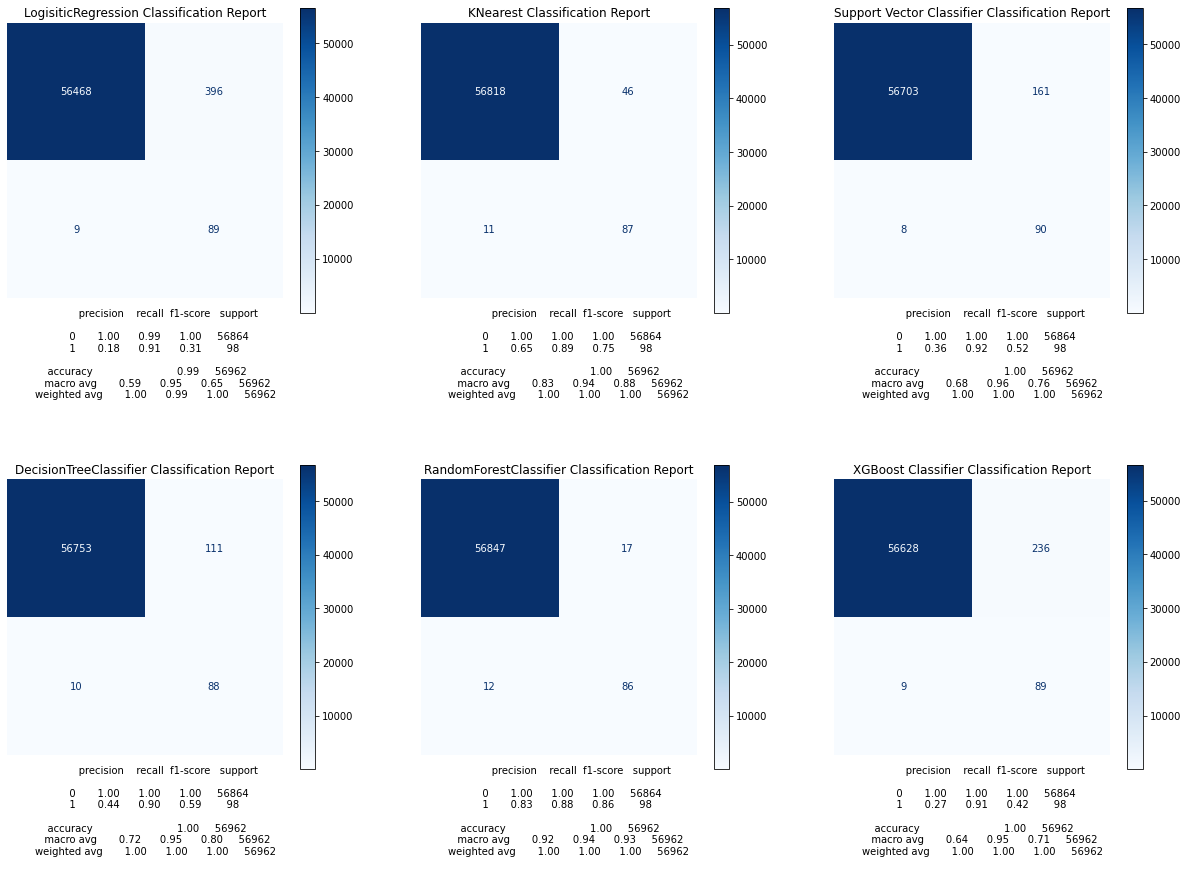

In [ ]:
model_evaluation(classifiers, original_Xtest, original_ytest)

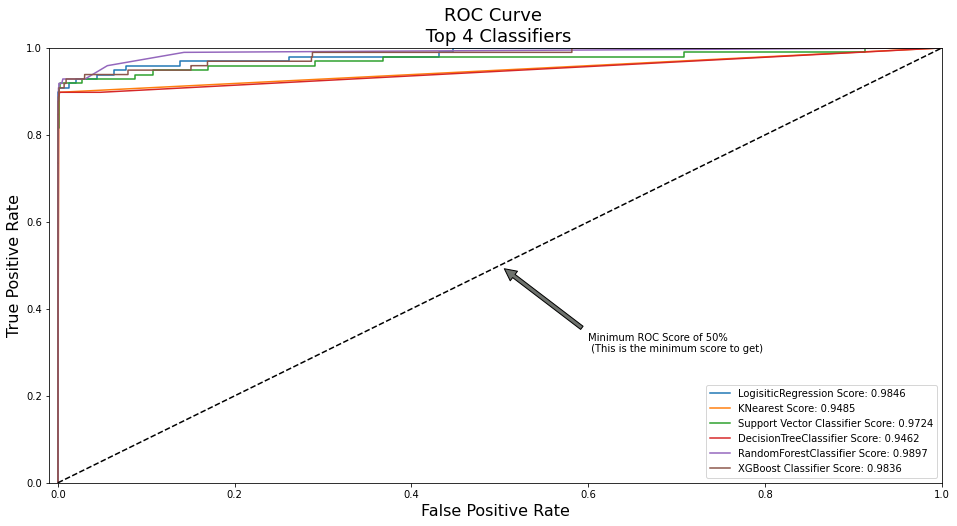

In [ ]:
roc_curves(classifiers, original_Xtest, original_ytest)

In [ ]:
execution_times=pd.DataFrame()
for model in classifiers:
    execution_times_model=pd.DataFrame()
    execution_times_model['Training execution time']=[classifiers[model]['training_execution_time']]
    execution_times_model.index=[model]
    execution_times=execution_times.append(execution_times_model)
execution_times

,Training execution time
LogisiticRegression,17.695913
KNearest,344.682540
Support Vector Classifier,1744.643028
DecisionTreeClassifier,120.624971
RandomForestClassifier,531.072400
XGBoost Classifier,285.601180


In [ ]:
model_execution(classifiers, Xsyn_train, ysyn_train)

Executing... LogisiticRegression
LogisiticRegressionExecution Complete...
Executing... KNearest
KNearestExecution Complete...
Executing... Support Vector Classifier


In [ ]:
model_evaluation(classifiers, original_Xtest, original_ytest)

In [ ]:
roc_curves(classifiers, original_Xtest, original_ytest)

In [ ]:
execution_times=pd.DataFrame()
for model in classifiers:
    execution_times_model=pd.DataFrame()
    execution_times_model['Training execution time']=[classifiers[model]['training_execution_time']]
    execution_times_model.index=[model]
    execution_times=execution_times.append(execution_times_model)
execution_times